In [1]:
import os
from Utils.visualization import *

Precision:0.9250, Recall:0.8810, F1-score:0.9024, Accuraci:0.8788, AUC:0.9210


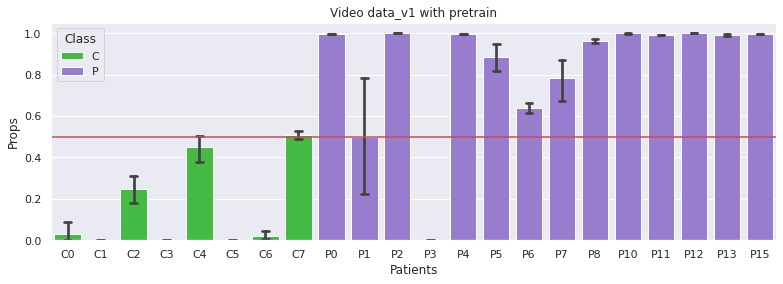

In [2]:
data_path = '/home/brayan/audiovisualpk/Results/Note:LOO_data_v1-Lr:0.001-Epoch:10-Exercise:Words.csv'
view_results(data_path)
plot_results_per_patient(data_path, 'Video data_v1 with pretrain')

Precision:0.7050, Recall:0.5222, F1-score:0.6000, Accuraci:0.5648, AUC:0.4586


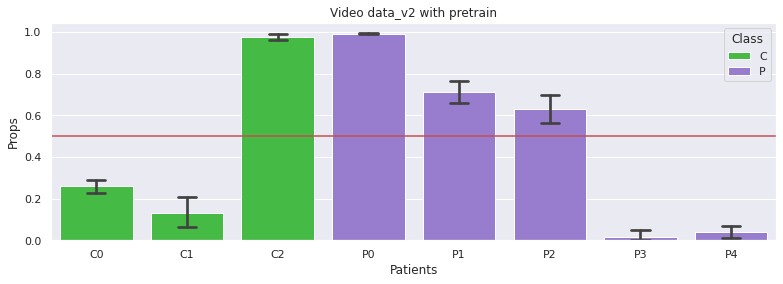

In [3]:
data_path = 'Results/Note:LOO_data_v2-Lr:0.001-Epoch:10-Exercise:Words.csv'
view_results(data_path)
plot_results_per_patient(data_path, 'Video data_v2 with pretrain')

Precision:0.5650, Recall:0.5148, F1-score:0.5388, Accuraci:0.4491, AUC:0.2687


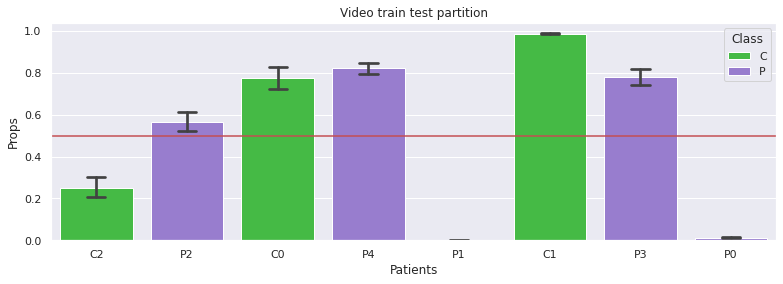

In [4]:
data_path = 'Results/Note:TTP_data_v1_vs_v2-Lr:0.001-Epoch:10-Exercise:Words.csv'
view_results(data_path)
plot_results_per_patient(data_path, 'Video train test partition')

Precision:0.5978, Recall:0.8492, F1-score:0.7016, Accuraci:0.5404, AUC:0.2413


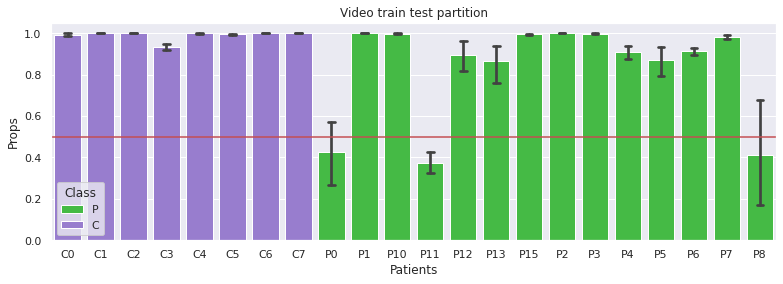

In [5]:
data_path = 'Results/Note:TTP_data_v2_vs_v1-Lr:1e-06-Epoch:25-Exercise:Words.csv'
path_data = '/home/brayan/AudioVisualData_v1'
view_results(data_path)
parkinson_patients = sorted(os.listdir("{}/Parkinson".format(path_data)))
control_patients   = sorted(os.listdir("{}/Control".format(path_data)))
plot_results_per_patient(data_path, 'Video train test partition', control_patients+parkinson_patients)

## Audio

Precision:0.7008, Recall:0.6333, F1-score:0.6654, Accuraci:0.6019, AUC:0.6029


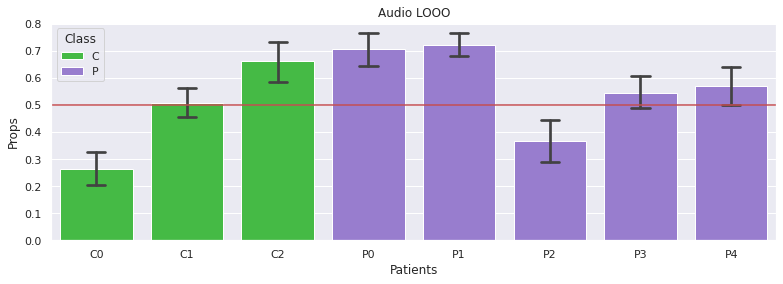

In [6]:
data_path = 'Results/Note:AUDIO:LOO_data_v2-Lr:2e-07-Epoch:75-Exercise:Words.csv'
view_results(data_path)
plot_results_per_patient(data_path, 'Audio LOOO')

Precision:0.6250, Recall:1.0000, F1-score:0.7692, Accuraci:0.6250, AUC:0.6329


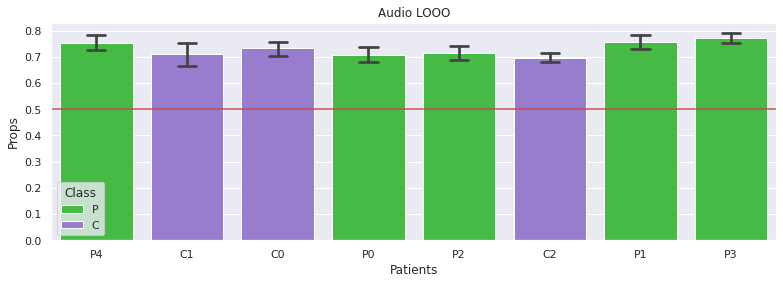

In [7]:
data_path = 'Results/Note:AUDIO_TTP_data_v1_vs_v2-Lr:1e-06-Epoch:25-Exercise:Vowels.csv'
view_results(data_path)
plot_results_per_patient(data_path, 'Audio LOOO')

Precision:0.8039, Recall:0.4881, F1-score:0.6074, Accuraci:0.5985, AUC:0.7262


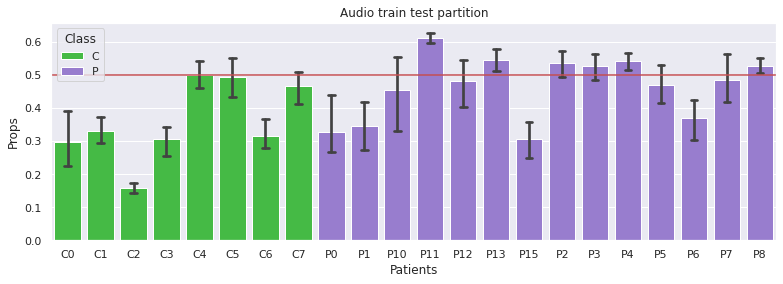

In [8]:
data_path = 'Results/Note:AUDIO_TTP_data_v2_vs_v1-Lr:1e-06-Epoch:25-Exercise:Phonemes.csv'
path_data = '/home/brayan/AudioVisualData_v1'
view_results(data_path)
parkinson_patients = sorted(os.listdir("{}/Parkinson".format(path_data)))
control_patients   = sorted(os.listdir("{}/Control".format(path_data)))
plot_results_per_patient(data_path, 'Audio train test partition', control_patients+parkinson_patients)

Precision:0.0000, Recall:0.0000, F1-score:0.0000, Accuraci:0.3750, AUC:0.4840


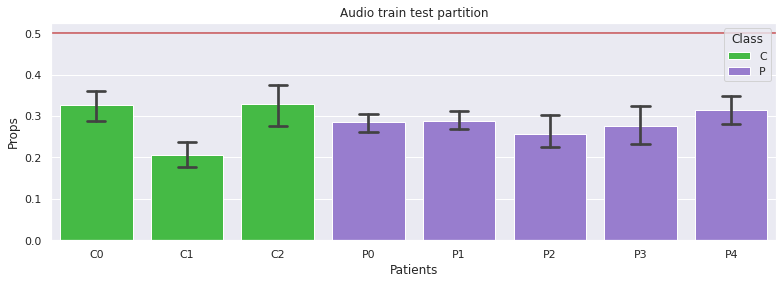

In [9]:
data_path = 'Results/Note:AUDIO_TTP_data_v1_vs_v2-Lr:1e-06-Epoch:25-Exercise:Phonemes.csv'
path_data = '/home/brayan/AudioVisualData_v2'
view_results(data_path)
parkinson_patients = sorted(os.listdir("{}/Parkinson".format(path_data)))
control_patients   = sorted(os.listdir("{}/Control".format(path_data)))
plot_results_per_patient(data_path, 'Audio train test partition', control_patients+parkinson_patients)